# Projet : Thème astral

In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import deque

# Sommaire

1. Introduction
2. Modèle
3. Position des planètes
    1. Paramètres orbitaux
    2. Calcul de l'anomalie moyenne
    3. Résolution de l'équation de Kepler
    4. Position des planètes dans le repère cartésien
4. Calcul de l'ascendant
5. Calcul du signe solaire
6. Thème astral
    1. Signe dans lequel se trouve la planète 
    2. Affichage du thème astral
7. Conclusion
8. Bibliographie

# 1. Introduction

# 2. Modèle

# 3. Position des planètes

## 3.A. Paramètres orbitaux

Pour pouvoir calculer la position des planètes, nous avons d'abord besoin de leurs paramètres orbitaux :   

- le demi-grand axe $a$  ($UA$)
   - Terre : $a = 1.000~~UA$
   - Venus : $a = 0.723~~UA$
   - Mercure : $a = 0.387~~UA$
   - Mars : $a = 1.524~~UA$   
   
- l'excentricité orbitale $e$  ($mesure~sans~unite$) : elle exprime l'écart de forme entre l'orbite et le cercle parfait dont l'excentricité est nulle
   - Terre : $e = 0.0167$
   - Vénus : $e = 0.0068$
   - Mercure : $e = 0.2056$
   - Mars : $e = 0.0934$
   

- la période de révolution $T~(années)$
   - Terre : $T = 365.26~années$
   - Vénus : $T = 224.7~années$
   - Mercure : $T = 87.97~années$
   - Mars : $T = 687~années$
   
   
- l'anomalie moyenne $M~(rad)$ : l'angle entre le périapse et la position d'un corps fictif parcourant une orbite circulaire synchrone avec le corps réel.
   - on a : $M = n\times(t-t_{0})$
      - avec $n = \dfrac{2\times \pi}{T}$ 

In [2]:
# Initialistation des paramètres orbitaux

planete = np.array(['Terre', 'Venus', 'Mercure', 'Mars'], dtype = str)
exc = np.array([0.0167, 0.0068, 0.2056, 0.0934]) #excentricité
sem = np.array([1.000, 0.723, 0.387, 1.524]) #demi-grand axe
T = [365.26, 224.7, 87.97, 687] #période
T0 = datetime(2000, 1, 1)  # époque de référence
M0 = 0

## 3.B. Calcul de l'anomalie moyenne

Comme dit plus haut, on a on a :  
<center>$M = n\times(t-t_{0})$   
<br>avec $n = \dfrac{2\times \pi}{T}$
<br></center>Ici, $t-t_{0}$ correspond au nombre de jours écoulés depuis l'époque de référence, c'est-à-dire le $1^{er}$ janvier 2000.    
<br>On calcule ensuite l'anomalie moyenne pour chaque planète (qui change puisque la période de révolution est différente) en fonction de la date de naissance.

## 3.C. Résolution de l'équation de Kepler

L'équation de Kepler en orbite elliptique est donnée par : 
<center> $E - e\times  sin(E) = M$

- $E$ l'anomalie excentrique ($rad$) : l'angle entre la direction du périapse et la position courante d'un objet sur son orbite

In [3]:
def kepler_equation(E, M, e):
    """Résout l'équation de Kepler pour trouver l'anomalie excentrique."""
    return E - e * math.sin(E) - M

#### Obtention de l'anomalie excentrique par la méthode de Newton-Raphson

<center> $g(E) = E - e\times sin(E) - M$  


    
<center>$E_{i+1} = {E_i} - \dfrac{g(E_{i})}{g'(E_{i})}$  
    


In [4]:
def solve_kepler(M, e):
    """Utilise la méthode de Newton-Raphson pour résoudre l'équation de Kepler."""
    E0 = M  # Initial guess for E
    tolerance = 1e-8  # Tolerance for convergence
    max_iterations = 1000  # Maximum number of iterations
    iteration = 0
    while True:
        f = kepler_equation(E0, M, e)
        f_prime = 1 - e * math.cos(E0)
        E = E0 - f / f_prime
        if abs(E - E0) < tolerance or iteration >= max_iterations:
            break
        E0 = E
        iteration += 1
    return E

## 3.D. Position des planètes dans le repère cartésien



<br><center> $x = a(cosE - e)$
<br> $y = a\sqrt{1-e^{2}}sinE$


In [5]:
def planet_position(a, e, E):
    """Calcule la position de la planète sur son orbite."""
    x = a * (math.cos(E) - e)
    y = a * math.sqrt(1 - e**2) * math.sin(E)
    return [x], [y]

In [6]:
def position(date_precise):
    #calcul de T0 et t
    delta_t = date_precise - T0
    T0_julian = 2451545.0
    t = T0_julian + delta_t.days + delta_t.seconds / 86400.0
    
    # Calculer l'anomalie moyenne à la date précise
    anom = np.array([])
    for i in T:
        n = 2*np.pi/i
        m = M0 + n * (delta_t.days)
        anom = np.append(anom,m)
    
    Ex = np.array([])
    for (M, e) in zip(anom, exc):
        ex = solve_kepler(M, e)
        Ex = np.append(Ex,ex)

    tab_x = np.array([])
    tab_y = np.array([])
    for (a, e, M, E, i) in zip(sem, exc, anom, Ex, planete):
        X = planet_position(a, e, E)[0]
        Y = planet_position(a, e, E)[1]
        tab_x = np.append(tab_x,X)
        tab_y = np.append(tab_y,Y)
        print("Position de la planète ", i, " :", X,Y)
    return tab_x, tab_y

In [7]:
annee = int(input("Entrez votre année de naissance : "))
mois = int(input("Entrez votre mois de naissance : "))
jour = int(input("Entrez votre jour de naissance : "))

X, Y = position(datetime(annee, mois, jour))

Entrez votre année de naissance :  2004
Entrez votre mois de naissance :  04
Entrez votre jour de naissance :  19


Position de la planète  Terre  : [-0.3306816991961111] [0.9492966326724223]
Position de la planète  Venus  : [0.7156751557579175] [-0.05896311561222072]
Position de la planète  Mercure  : [0.07889000021514066] [-0.3455296725569475]
Position de la planète  Mars  : [-0.608287069548857] [1.4446811476535402]


In [8]:
# Fonction pour calculer la trajectoire circulaire
def calculer_trajectoire_circulaire(x, y):
    rayon = np.sqrt(x**2 + y**2)
    angles = np.linspace(0, 2*np.pi, 100)
    x_traj = rayon * np.cos(angles)
    y_traj = rayon * np.sin(angles)
    return x_traj, y_traj

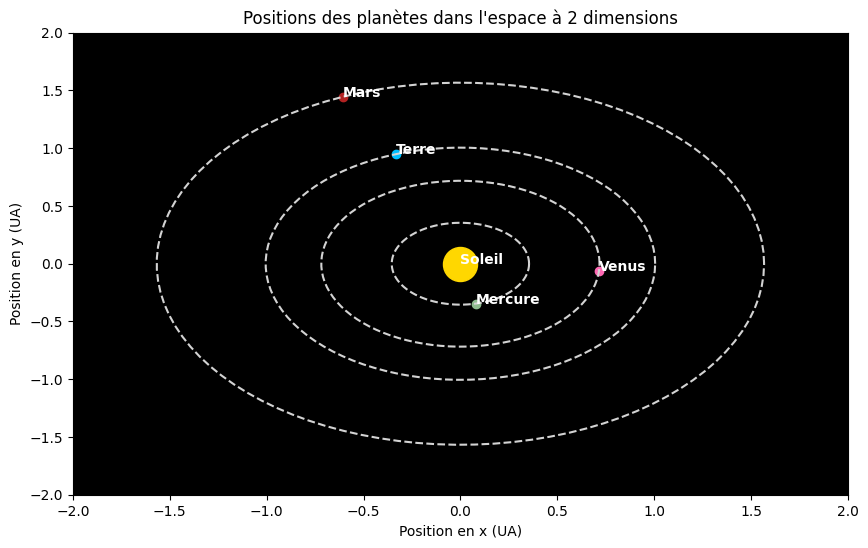

In [9]:
# Créer le graphique
couleur = iter(['deepskyblue', 'hotpink', 'darkseagreen', 'firebrick'])

plt.figure(figsize=(10, 6))

for i in range(4):
    plt.scatter(X[i], Y[i], color= next(couleur), marker='o')
    
#Soleil
plt.scatter(0,0, color='gold', s=600)
plt.text(0,0, 'Soleil', color='white', fontweight='bold')

# Trajectoires circulaires des planètes
for i in range(4):
    x_traj, y_traj = calculer_trajectoire_circulaire(X[i], Y[i])
    plt.plot(x_traj, y_traj, color='lightgray', linestyle='--')

    
    
# Ajouter des étiquettes pour les planètes
for i in range(4):
    plt.text(X[i], Y[i], planete[i], color='white', fontweight='bold')
    
# Définir les labels des axes
plt.xlabel('Position en x (UA)')
plt.ylabel('Position en y (UA)')
plt.title('Positions des planètes dans l\'espace à 2 dimensions')

# Afficher le graphique
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor('black')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

# 4. Calcul de l'ascendant 

  
Pour calculer l'ascendant, il faut suivre plusieurs étapes : 
1. Calculer son heure sidérale, qui est une mesure du temps basée sur la rotation de la Terre par rapport aux étoiles fixes. Un jour sidéral est le temps nécessaire à la Terre pour effectuer une rotation complète par rapport aux étoiles fixes, et est légèrement plus court que le jour solaire.
2. Additionner son heure de naissance avec l'heure sidérale
3. Ajuster l'heure obtenue à l'étape précédente en fonction des conventions de mesure du temps en vigueur à l'époque de la naissance, comme par exemple l'instauration des fuseaux horaires et l'adoption de l'heure d'été dans certaines régions. 
4. Faire correspondre l'heure à un ascendant

In [10]:
# Paramètres de naissance
naissance = str(annee)+ '-' + str(mois) + '-' + str(jour)
heure_naissance = input("Entrez l'heure de naissance : ")
timezone_offset = 2  # Heure locale est UTC+1 (vous devrez ajuster ceci en fonction du fuseau horaire)
latitude = 48.8583  # Latitude de Paris
longitude = 2.2945   # Longitude de Paris

Entrez l'heure de naissance :  20:30:00


In [11]:
# Convertir la date de naissance en objet datetime
date_et_heure = datetime.strptime(naissance + ' ' + heure_naissance, '%Y-%m-%d %H:%M:%S')

In [12]:
# Fonction pour calculer le temps sidéral moyen (GMST)
def calculate_gmst(utc_time):
    # Calculer le jour julien
    jd = 367 * utc_time.year - 7 * ((utc_time.year + (utc_time.month + 9) // 12) // 4) + 275 * utc_time.month // 9 + utc_time.day + 1721013.5
    # Calculer la fraction du jour julien
    jd_frac = (utc_time.hour + (utc_time.minute + utc_time.second / 60) / 60) / 24
    # Calculer le nombre de jours depuis le 1er janvier 2000 (J2000.0)
    d = jd - 2451545.0
    # Calculer le temps sidéral moyen en heures
    gmst = 6.697374558 + 0.06570982441908 * d + 1.00273790935 * jd_frac
    # Normaliser le temps sidéral entre 0 et 24 heures
    gmst = gmst % 24
    return gmst

In [13]:
# Calculer le temps sidéral moyen (GMST)
gmst = calculate_gmst(date_et_heure)

def heure_ascendant (utc_time, sideral):
    temp = (utc_time.hour + (utc_time.minute + utc_time.second / 60) / 60) + sideral
    if utc_time.year > 1976:
        if utc_time.month > 3 and utc_time.month < 11:
            temp = temp -3
        else :
            temp = temp -1
    if temp > 24:
        temp = temp -24
    return temp

In [14]:
# Fonction pour convertir l'ascendant en signe astrologique
def _ascendant_(heure):
    if heure >= 17.98 and heure <= 18.97:
        return "Bélier"
    elif heure >= 18.98 and heure <= 20.28:
        return "Taureau"
    elif heure >= 20.29 and heure <= 22.13:
        return "Gémeaux"
    elif heure >= 22.14 and heure <= 0.55:
        return "Cancer"
    elif heure >= 0.56 and heure <= 3.27:
        return "Lion"
    elif heure >= 3.28 and heure <= 6.00:
        return "Vierge"
    elif heure >= 6.01 and heure <= 8.72:
        return "Balance"
    elif heure >= 8.73 and heure <= 11.42:
        return "Scorpion"
    elif heure >= 11.43 and heure <= 13.88:
        return "Sagittaire"
    elif heure >= 13.89 and heure <= 15.70:
        return "Capricorne"
    elif heure >= 15.71 and heure <= 17.00:
        return "Verseau"
    else:
        return "Poissons"

In [15]:
print('Votre ascendant est', _ascendant_(heure_ascendant(date_et_heure, gmst)))

Votre ascendant est Balance


# 5. Calcul du signe solaire

Le calcul du signe solaire ne dépend que du jour de la naissance de la personne. 

In [16]:
def signe_sol(mois,jour):
    if (mois == 3 and jour >= 21) or (mois == 4 and jour <= 20):
        return "Bélier"
    elif (mois == 4 and jour >= 21) or (mois == 5 and jour <= 20):
        return "Taureau"
    elif (mois == 5 and jour >= 21) or (mois == 6 and jour <= 21):
        return "Gémeaux"
    elif (mois == 6 and jour >= 22) or (mois == 7 and jour <= 23):
        return "Cancer"
    elif (mois == 7 and jour >= 24) or (mois == 8 and jour <= 23):
        return "Lion"
    elif (mois == 8 and jour >= 24) or (mois == 9 and jour <= 23):
        return "Vierge"
    elif (mois == 9 and jour >= 24) or (mois == 10 and jour <= 23):
        return "Balance"
    elif (mois == 10 and jour >= 24) or (mois == 11 and jour <= 22):
        return "Scorpion"
    elif (mois == 11 and jour >= 23) or (mois == 12 and jour <= 20):
        return "Sagittaire"
    elif (mois == 12 and jour >= 21) or (mois == 1 and jour <= 20):
        return "Capricorne"
    elif (mois == 1 and jour >= 21) or (mois == 2 and jour <= 19):
        return "Verseau"
    else:
        return "Poissons"

In [17]:
print('Votre signe solaire est', signe_sol(mois,jour))

Votre signe solaire est Bélier


# 6. Thème astral

## 6.A. Signe dans lequel se trouve la planète

<center>$\theta = \dfrac{longitude\times 360}{2\pi\times distance~moyenne~~Terre/Planete}$

In [18]:
#convertir longitudes UA en degres
def deg(long, dist):
    return (long * 360)/2*np.pi*dist

In [26]:
distance = [1, 0.7, 0.38, 1.5237] #par rapport au Soleil en UA
degre = []

for (long,dist) in zip(X,distance):
    degre.append(deg(long, dist))

In [20]:
signe_traverse = []
_signes_ = ['Bélier', 'Taureau', 'Gémaux', 'Cancer', 'Lion', 'Vierge', 'Balance', 'Scorpion', 'Sagittaire', 'Capricorne', 'Verseau', 'Poisson']
for i in degre:
    signe_traverse.append(i//30)

In [21]:
for (j,l) in zip(signe_traverse, planete):
    j=j%12
    print('La planète ', l, 'est dans le signe du', _signes_[int(j)])

La planète  Terre est dans le signe du Vierge
La planète  Venus est dans le signe du Capricorne
La planète  Mercure est dans le signe du Bélier
La planète  Mars est dans le signe du Balance


## 6.B. Affichage du thème astral

In [22]:
clr = ['deepskyblue', 'hotpink', 'darkseagreen', 'firebrick']

In [23]:
def plot_theme_astral(ascendant_str):
    # Liste des signes du zodiaque dans l'ordre
    signes = ["Bélier", "Taureau", "Gémeaux", "Cancer", "Lion", "Vierge", "Balance", "Scorpion", "Sagittaire", "Capricorne", "Verseau", "Poisson"]
    
    #rotation
    signes.reverse()
    index=signes.index(ascendant_str)
    signes=deque(signes)
    signes.rotate(-index+3)
    signes=list(signes)
    
    # Trouver l'index de l'ascendant dans la liste des signes
    ascendant_index = signes.index(ascendant_str)
    
    # Création de la figure et des axes
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Déterminer l'angle de départ en fonction de l'ascendant
    start_angle = 360 / len(signes) * ascendant_index
    
    # Tracer le cercle du thème astral
    for i in range(len(signes)):
        angle = (start_angle + i * (360 / len(signes))) % 360  # Angle pour chaque signe
        ax.plot([np.cos(np.radians(angle)), np.cos(np.radians(angle + (360 / len(signes))))], [np.sin(np.radians(angle)), np.sin(np.radians(angle + (360 / len(signes))))], 'k-')  # Relier chaque signe au suivant
        if signes[i] == signe_sol(mois,jour):
            ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)), signes[i], ha='center', va='center')  # Affichage du nom de chaque signe
            ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)) - 0.1, 'Soleil', ha='center', va='center', fontweight='bold', color='gold')  
        elif signes[i] == ascendant_str:
            ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)), signes[i], ha='center', va='center')  # Affichage du nom de chaque signe
            ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)) - 0.1, 'Ascendant', ha='center', va='center', fontweight='bold', color='red')  
        for (j,l,p) in zip(signe_traverse, planete, clr):
            j=j%12
            if signes[i] ==  _signes_[int(j)]:
                ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)), signes[i], ha='center', va='center')  # Affichage du nom de chaque signe
                ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)) - 0.2, l , ha='center', va='center', fontweight='bold', color=p)  
            else:
                ax.text(1.2 * np.cos(np.radians(angle)), 1.2 * np.sin(np.radians(angle)), signes[i], ha='center', va='center')  # Affichage du nom de chaque signe
    
    # Affichage de l'ascendant
    ax.plot(-1, 0, 'ro', label=ascendant_str)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    ax.text(0, 0, 'Thème astral', ha='center', va='center', fontsize=16, fontweight='bold', fontstyle='italic', color='lightcoral')
    plt.show()

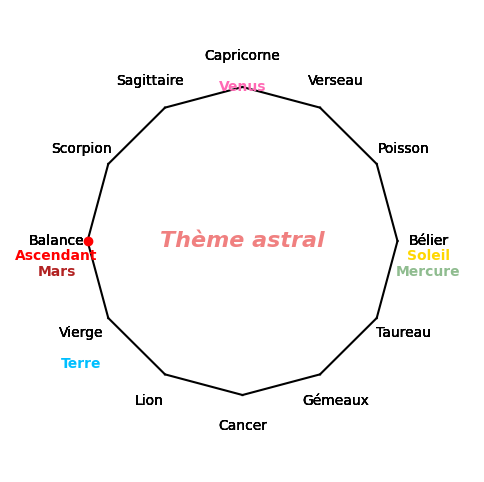

In [24]:
ascendant = _ascendant_(heure_ascendant(date_et_heure, gmst))
plot_theme_astral(ascendant)

# 7. Conclusion

# 8. Bibliographie

paramètres orbitaux : https://fr.wikipedia.org/wiki/Mod%C3%A8le:Param%C3%A8tres_orbitaux_des_plan%C3%A8tes_et_plan%C3%A8tes_naines_du_Syst%C3%A8me_solaire

équations de Kepler :  https://fr.wikipedia.org/wiki/%C3%89quation_de_Kepler

équations de Kepler et méthode de Newton-Raphson : https://www.f-legrand.fr/scidoc/docmml/sciphys/meca/kepler/kepler.html

méthode de Newton-Raphson : http://revue.sesamath.net/spip.php?article1230#:~:text=La%20m%C3%A9thode%20de%20Newton%2DRaphson%20%5B1%5D%20est%20un%20proc%C3%A9d%C3%A9,sa%20courbe%20permettent%20d%27%C3%A9viter

calcul de l'ascendant : https://chris-semet.net/votre-astro-pratique/comment-calculer-votre-ascendant/

esthétique des graphiques : https://chat.openai.com/